<a href="https://colab.research.google.com/github/emilianog4/Data-Science-Projects/blob/main/Simulaci%C3%B3n_de_resultados_de_convergencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de resultados de convergencia

En este *notebook* estudiaremos empíricamente algunos resultados notables sobre convergencia que, no solo hemos estudiado en esta última posta del bloque de Probabilidades, sino que... ¡venimos explorando intuitivamente en estos notebooks desde el día! Los dos resultados sobre los que analizaremos empíricamente usando Python serán:

- la Ley de los Grandes Números (LGN), y
- el Teorema Central del Límite (TCL).

Estos resultados se dicen "de convergencia" pues presentan el resultado de una situación límite (¡sí, los mismos límites que ya estudiamos en EAM!).

Esta semana NO habrá trabajo de simulación, volveremos a encontrarnos con un trabajo a producir y entregar cuando iniciemos el bloque de Estadística.

In [ ]:
# Cargamos las librerías que ya estudiamos en el notebook 1
import numpy as np
import random as rd

# Pero vamos a usar algunas más...
# De scipy importamos stats para poder tener generadores de muestras provenientes
# de las variables aleatorias usuales (https://docs.scipy.org/doc/scipy/reference/stats.html)
from scipy import stats

# E importamos algunas más para poder hacer algunos gráficos útiles
import seaborn as sns
import matplotlib.pyplot as plt

# Fijamos una semilla para que todo sea reproducible
rd.seed(123)

# Y definimos unos parámetros estéticos de seaborn para que todo luzca mejor
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

# Para evitar que nos aparezcan resultados en notación científica
np.set_printoptions(suppress=True)

## Ley de los grandes números

### Ejemplo 1: Moneda cargada

Recordemos un ejemplo que simulamos en el Notebook 2, cuando recién comenzábamos a estudiar variables aleatorias. Tenemos una moneda cargada y la lanzamos una cierta cantidad de veces, digamos $N$.

En aquel momento, intuimos que una forma de estimar la probabilida de obtener "cara" en esta moneda cargada imaginaria, podía estimarse haciendo una simulación. ¿Cómo? A través de la frecuencia relativa, es decir, contando la cantidad de veces que obteníamos "cara" y dividiendo por el total de veces que habíamos repetido el experimento.

En su momento, nos había quedado algo más o menos como esto.

In [ ]:
#### 1: Experimento aleatorio
moneda = list(range(0,2))

def experimento_moneda_cargada():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado es un número: 1, si éxito; 0, si fracaso
    '''
    resultado = rd.choices(moneda, weights=(0.3,0.7), k=1)
    return resultado

#### 2: Muestra aleatoria
rd.seed(123)
N = 10000
muestra = [experimento_moneda_cargada() for _ in range(N)]

#### 3: Una función _"filtro"_
def sale_cara(resultado):
    return resultado == [1]

#### 4: Aproximamos P(E) por la proporción de elementos de E en la muestra
prob = sum(1 for e in muestra if sale_cara(e))/N
print(f'Probabilidad aproximada de que salga cara, P(X=1), es', prob)

Probabilidad aproximada de que salga cara, P(X=1), es 0.7022


Modelemos el por qué es posible que esto funcione. Para ello, llamemos $X$ a la variable aleatoria con distribución Bernoulli de parámetro $p$ y digamos que $X$ toma el valor $1$ si sale "cara" al lanzar la moneda cargada y $0$, si no. Es decir,

$$R_X=\{0,1\},$$

y como la moneda está cargada

$$P(X=0)=P(\text{cruz})=1-p,$$

$$P(X=1)=P(\text{cara})=p.$$

Supongamos que queremos estimar $P(X=1)=p$ a partir de una simulación. Usamos la frecuencia relativa, muy bien, ¿pero qué significa eso? ¿Por qué "eso" podría relacionar con alguno de los resultados de convergencia que estudiamos? O, mejor dicho, ¿cómo es que se podría relacionar?

Para eso, comencemos a hablar de **muestras**. Pensemos en la muestra aleatoria $X_1, \cdots, X_n$ que contiene los resultados de $n$ lanzamientos de la moneda. Cada una de esas variables aleatoria se distribuye como la variable $X$ de la población. Es decir, las $X_i$ son todas variables aleatorias independientes y con igual distribución que $X$: Bernoulli de parámetro $p$,

$$
X_i\sim Be(p), \text{ para todo } i.
$$

**¿Pero, qué es la frecuencia relativa?** Contar cuántas veces sale el resultado de interés, que en este caso es $1$, y dividir por el total de repeticiones, que en ese caso es $n$.

Recordemos que, como las $X_i$ son Bernoulli, cada una de ellas toma el valor $1$ cuando sale "cara", y $0$ cuando no. Entonces, contar la cantidad de "caras" equivale a **sumar todos los resultados** de las $X_i$, pues se sumará un $1$ cuando salga "cara", y 0 en los demás casos. Por lo tanto, la frecuencia relativa, llamémosla $f_n$, puede definirse como

$$
f_n=\frac{\sum_{i=1}^n{X_i}}{n}=\overline{X}_n.
$$

Es decir, la frecuencia aleatoria es precisamente $\overline{X}_n$.

Y por la **Ley de los grandes números**, sabemos que $\overline{X}_n$ converge en probabilidad al parámetro $p$, pues $p=E(X)$.

Es decir, a medida que aumentamos $n$, la cantidad de repeticiones del experimento, la frecuencia relativa $f_n=\overline{X_n}$ converge al parámetro $p$, ¡que no conocemos, pero queremos conocer a partir de "los datos"! En casos como este, se dice que la frecuencia relativa es un **estimador** del parámetro $p$ que no conocemos.

Esto es lo que da el sustento matemático a esa intuición que seguramente todos tuvimos alguna vez, y a las simulaciones que estuvimos haciendo en la primera parte de esta posta.

En lo que sigue, vamos a ver cómo la **estimación** de $p$ mejora a medida que aumentamos la cantidad de repeiticiones del experimento, que en nuestro código, es $N$. Para no agregar una "fuente de ruido" adicional, lo ideal será fijar una semilla.

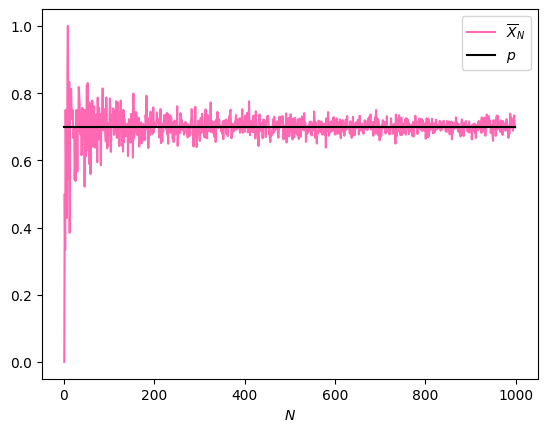

In [ ]:
def proporcion_estimada(N):
    muestra = [experimento_moneda_cargada() for _ in range(N)]
    prop = sum(1 for e in muestra if sale_cara(e))/N
    return prop

N=1000
rd.seed(123)
enes = range(1,N)
proba = [0.7 for n in enes]
plt.plot(enes,[proporcion_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,proba, color='black', label='$p$')
plt.xlabel('$N$')
plt.legend();

Los puntos rosas son estimaciones de $p$ para cada $n$ (que en nuestra simulación es $N$). En negro vemos la línea que corresponde al verdadero valor de $p$ que, en nuestro caso, es $0.7$.

¡Claro! Lo que vemos es que, al aumentar la cantidad de repeticiones del experimento, $n$, la estimación de la probabilidad dada por $f_n=\overline{X}_n$ converge al parámetro $p$, que en el ejemplo de la moneda cargada era $0.7$. Esto es así por la **Ley de los grandes números**.

De hecho, podés observar que, para $n$ "chicos" (por ejemplo, menores que 10), las estimaciones no son nada buenas...

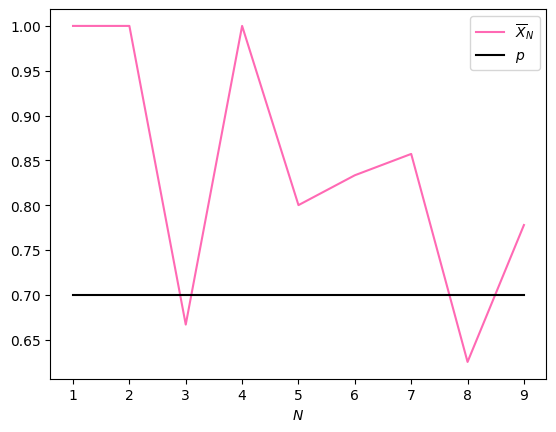

In [ ]:
N=10
enes = range(1,N)
proba = [0.7 for n in enes]
plt.plot(enes,[proporcion_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,proba, color='black', label='$p$')
plt.xlabel('$N$')
plt.legend();

En términos de nuestro ejemplo, esto equivale a decir que **es muy difícil darse una idea de si la moneda está cargada lanzándola solamente 10 veces (o menos)**. Sin embargo, esto parece que empieza a revertirse a medida que aumentamos la cantidad de lanzamientos. Veamos qué ocurre cuando tenemos hasta 30 lanzamientos...

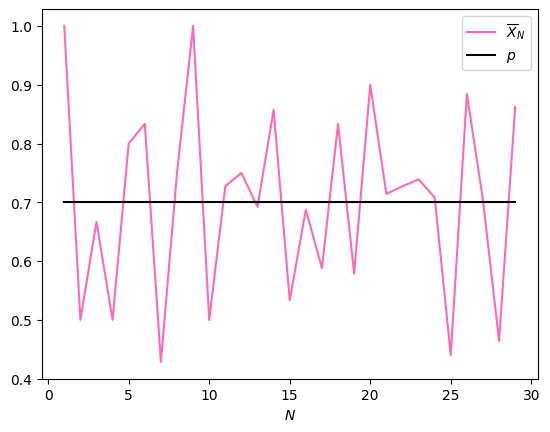

In [ ]:
N=30
enes = range(1,N)
proba = [0.7 for n in enes]
plt.plot(enes,[proporcion_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,proba, color='black', label='$p$')
plt.xlabel('$N$')
plt.legend();

Para $n=30$, en este caso, ya empieza a verse alguna tendencia. Con $n=50$, parece detectarse mejor aún.

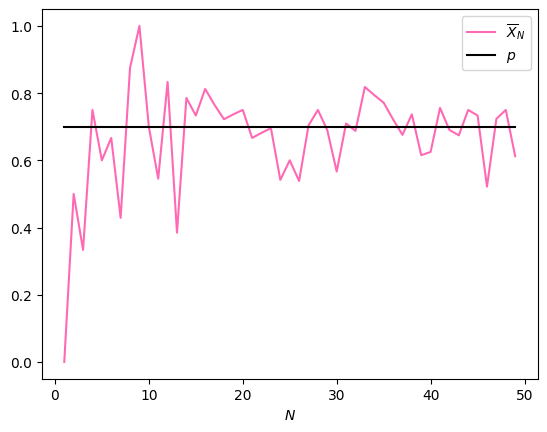

In [ ]:
N=50
rd.seed(123)
enes = range(1,N)
proba = [0.7 for n in enes]
plt.plot(enes,[proporcion_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,proba, color='black', label='$p$')
plt.xlabel('$N$')
plt.legend();

¿Te animás a probar qué ocurre con $n=5000$?

### Ejemplo 2: La media

¿Sólo podremos estimar probabilidades con la Ley de los Grandes Números? ¡Claro que no! Este resultado de convergencia casi que nos sugiere que siempre que usemos $\overline{X}_n$ estaremos estimando $E(X)$. Es decir, la media muestral parece estimar muy bien a la esperanza.

Existen muchas estrategias de estimación y el estudio de las propiedades deseables que queremos que estos estimadores tengan escapan al objetivo de este curso. Sin embargo, inspeccionemos a partir de simulaciones algunos ejemplos.

Sea $X$ la variable aleatoria normal con esperanza $\mu$ y varianza $\sigma^2$. Es decir $X\sim N(\mu,\sigma^2)$. Repliquemos el estudio que hicimos en el Notebook 3 de Python para la variable aleatoria $X\sim N(170,5^2)$, que representaba el siguiente fenómeno:

$$X: \text{ altura (en centímetros) de las personas de Argentina}.$$

In [ ]:
# Definimos los parámetros de la normal
mu = 170
sigma = 5

# La definimos
normal = stats.norm(mu, sigma)

# Obtenemos sus momentos
esperanza, varianza = normal.stats(moments='mv')

Ya sabemos que la esperanza de esta variable es $170$, es decir, $E(X)=170$. Sin embargo, en la vida real, rara vez conocemos los parámetros de una población. ¿Qué hacemos en esos casos? Tomamos, bajo ciertos reparos, una muestra de esa población y esperamos que esa muestra "nos dé algo de información" sobre el fenómenos que desconocemos. Algo parecido a lo que ocurría con la moneda cargada: no sabemos cuál es la probabilidad de que salga cara, pero podemos lanzarla muuuuuuuuuchas veces (LGN) y con la frecuencia relativa de "cara" estimar esa probabilidad (parámetro) desconocida.

Entonces, para lo que sigue, supongamos que tenemos una muestra de $n$ personas de esta población. Es decir, tomamos la altura de $n$ personas de Argentina y, con ellas quisiéramos darnos una idea de cual es la altura media de la población. ¿Cómo vamos a estimar $E(X)=\mu$?

Como vimos, por la LGN, un estimador que parece razonables es $\overline{X}_n$. Es decir, ¡el promedio de las alturas de la muestra! Simulémoslo y veamos qué tal nos va con esa estimación y con la convergencia a medida que variamos el tamaño de muestra.

Comencemos por generar una muestra de tamaño $n=10$ y usémosla para estimar $\mu$.

In [ ]:
n = 10
rd.seed(123)
muestra = stats.norm.rvs(mu, sigma, n)
np.mean(muestra)

169.9584661794289

¡Nada mal! Con apenas 10 datos, parece que obtenemos una estimación bastante aceptable de la verdadera esperanza. Simulemos para diferentes $n$.

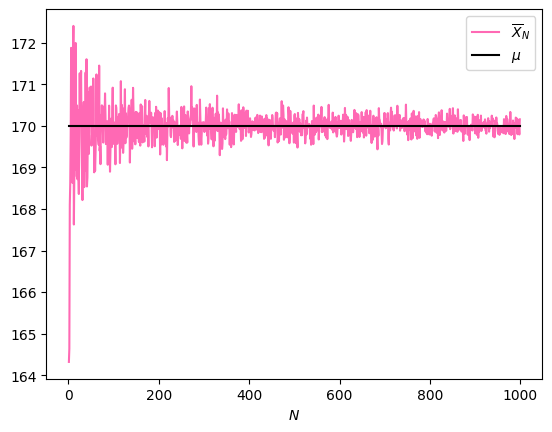

In [ ]:
def media_estimada(N):
    rd.seed(123)
    muestra = stats.norm.rvs(mu, sigma, N)
    media = np.mean(muestra)
    return media

N=1000
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,esp, color='black', label='$\mu$')
plt.xlabel('$N$')
plt.legend();

Los puntos rosas son estimaciones de $\mu$ para cada $n$ (que en nuestra simulación es $N$). En negro vemos la línea que corresponde al verdadero valor de $\mu$ que, en nuestro caso, es $170$.

¡Claro! Lo que vemos es que, al aumentar el tamaño de muestra $n$, la estimación de la esperanza $\mu$ dada por el promedio muestral $\overline{X}_n$ converge a $\mu$, que en el ejemplo de las alturas era $170$.

Como hicimos antes, observemos qué ocurre para $n$ "chicos" (por ejemplo, menores que 10, que 30 y que 50).

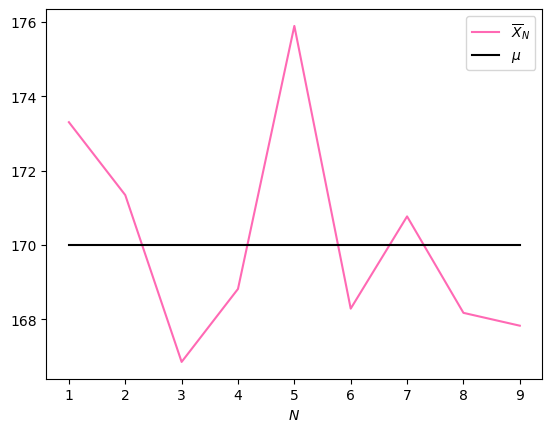

In [ ]:
N=10
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,esp, color='black', label='$\mu$')
plt.xlabel('$N$')
plt.legend();

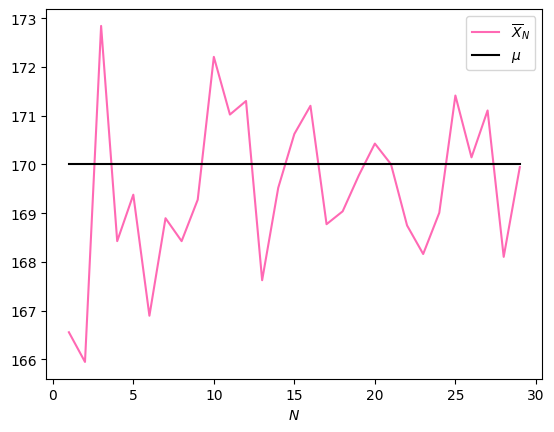

In [ ]:
N=30
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,esp, color='black', label='$\mu$')
plt.xlabel('$N$')
plt.legend();

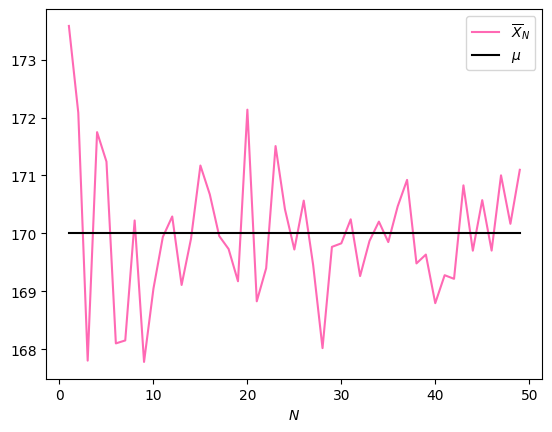

In [ ]:
N=50
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,esp, color='black', label='$\mu$')
plt.xlabel('$N$')
plt.legend();

### Propiedades de $\overline{X}_n$
Lo que ocurre con $\overline{X}_n$ es que, al aumentar $n$ al infinito, ¡deja de tener variabilidad para concentrarse completamente en $E(X)$. Gráficamente podemos convencernos...

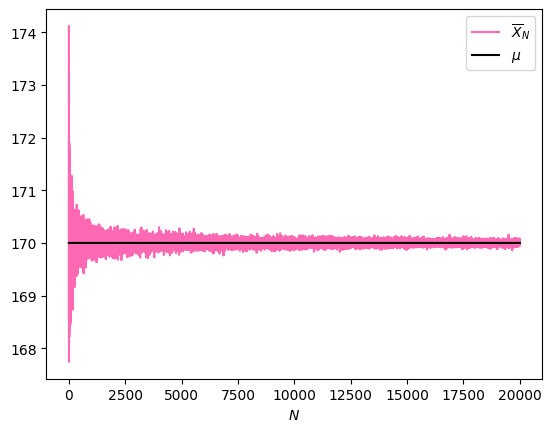

In [ ]:
N=20000
enes = range(1,N)
esp = [mu for n in enes]
plt.plot(enes,[media_estimada(n) for n in enes], color='hotpink', label='$\overline{X}_N$')
plt.plot(enes,esp, color='black', label='$\mu$')
plt.xlabel('$N$')
plt.legend();

Aunque también podemos convencernos "matemáticamente", usando las propiedades de varianza que conocemos. Notemos que $\overline{X}_n$ es una variable aleatoria. ¡No sabemos su distribución, en general! Sin embargo, como las $X_i$ son todas variables independientes y con igual distribución, por lo tanto, podremos calcular su esperanza y su varianza.

####   **Esperanza de $\overline{X}_n$**

$$
\begin{aligned}
E(\overline{X}_n)&=E\left(\frac{\sum_{i=1}^{n}X_i}{n}\right)\\
&=\frac{1}{n}E\left(\sum_{i=1}^{n}X_i\right)\\
&=\frac{1}{n}\sum_{i=1}^{n}\left(E(X_i)\right)\\
&=\frac{1}{n}n\cdot E (X)\\
&=E (X)\\
\end{aligned}
$$

####   **Varianza de $\overline{X}_n$**

$$
\begin{aligned}
V(\overline{X}_n)&=V\left(\frac{\sum_{i=1}^{n}X_i}{n}\right)\\
&=\frac{1}{n^2}V\left(\sum_{i=1}^{n}X_i\right)\\
&=\frac{1}{n^2}\sum_{i=1}^{n}\left(V (X_i)\right)\\
&=\frac{1}{n^2}n\cdot V (X)\\
&=\frac{V(X)}{n}\\
\end{aligned}
$$

**¿Qué quiere decir esto?** Que la variable $\overline{X}_n$ está centrada en $E(X)$ y que su varianza se va a $0$ cuando $n$ tiende a infinito.

¡Y esto es precisamente lo que vemos gráficamente! La media muestral se concentra en la esperanza y su varianza es cada vez más pequeña a medida que aumentamos $n$.

#### **Distribución de $\overline{X}_n$**

Ya vimos que:

*   $\overline{X}_n$ es una variable aleatoria,

*   $\overline{X}_n$ está centrada en $E(X)$ y que

*   $\overline{X}_n$ tiene varianza $\frac{V(X)}{n}$, es decir, su varianza se va a $0$ cuando $n$ tiende a $\infty$.

**Y lo sorprendente es que todo esto vale ¡sin importar qué distribución tengan las $X_i$!** No importa si son discretas o continuas, si son uniformes, normales, exponenciales, o no tienen distribución conocida... mientras estén bien definidos sus momentos (esperanza y varianza), la variable aleatoria que resulte de promediar una muestra de estas $X_i$ tendrá todas esas características.

En algún sentido, lo que estamos diciendo es que el promedio tiende a "matar" la variabilidad de las cosas que promedia, llevándolas a un centro común.

Pero, ¿sabemos cómo se distribuye, en general, $\overline{X}_n$? ¡No! No lo sabemos en general: es algo que depende fuertemente de la distribución de las $X_i$. Sin embargo... **¡sí sabemos cuál es su distribución límite!** Es decir, la distribución cuando $n \longrightarrow \infty$. Eso da pie para introducir el **Teorema Central del Límite** en la próxima sección.

## Teorema central del límite



¡No todo es normal en el mundo de las probabilidades! Sin embargo, la distribución normal sí es cierto que aparece como una distribución límite en el contexto de ciertas distribuciones muestrales, como la de $\overline{X}_n$.

El **Teorema central del límite** (TCL) establece que, bajo hipótesis no muy rígidas sobre variables aleatorias $X_i$ (que sean independientes, que todas tengan la misma distribución y con esperanza $E(X)=\mu$ y varianza $V(X)=\sigma^2$ finitas), la distribución límite de la variable

$$
Z_n=\frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}}
$$

es la distribución $N(0,1)$.

Es decir, cuando $n\longrightarrow \infty$,

$$
\frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}} \stackrel{\mathcal{D}}{\longrightarrow} N(0,1).
$$

Naturalmente, el $n$ de cualquier experimento o simulación que hagamos nunca será infinito, sin embargo, el resultado anterior suele ser "bueno" aún para $n$ finitos y no muy grandes. Es decir, para un $n$ fijo y suficientemente grande,

$$\frac{\overline{X}_n-\mu}{\sigma/\sqrt{n}} \approx N(0,1),$$

donde el símbolo "$\approx$" denota que la distribución NO es exacta, sino aproximada.

Y, en esa línea, podemos pensar que para un $n$ fijo y suficientemente grande,

$$\overline{X}_n \approx N(\mu,\sigma^2/n).$$

#### Calentando motores...
Antes de avanzar con detalles técnicos, veamos qué pasa en una **simulación controlada**. ¿Por qué controlada? Porque vamos a considerar que las $X_i$ son variables aleatorias **normales**. Cuando esto ocurre, la distribución de $\overline{X}_n$ es normal (¡y es una distribución exacta, no asintótica!), pero no por el TCL, sino porque es una propiedad que se cumple precisamente porque las $X_i$ son normales.

Para lo que sigue, tomemos una muestra de $N$ variables aleatorias normales como las que imaginamos para la altura de las personas en Argentina. Para $N\in \{10,100,1000,10000\}$, calculemos $\overline{X}_N$.

Si queremos ver cómo se distribuye $\overline{X}_N$, lo que vamos a necesitar es generarnos muchas de esas medias muestrales. Y, por ahora, la forma de inspeccionar visualmente el comportamiento empírico de una distribución es haciendo un histograma.

Para facilitar las cosas, comencemos trabajando con $N=10$. Es decir, tomamos una muestra de $N=10$ variables y las promediamos. Eso nos da una media muestral observada $\overline{x}_{10}$.

In [ ]:
rd.seed(123)
muestra = stats.norm.rvs(mu, sigma, N)
media = np.mean(muestra)
media

170.019194462148

Este numerito $\overline{x}_{10}$ que acabamos de obtener es solo UNA realización de $\overline{X}_{10}$, por lo tanto, si queremos darnos una idea de su distribución empírica, ¡vamos a necesitar muchas realizaciones más! ¿Cuántas? Bueno, para responder esto de nuevo aplica lo que ya sabemos por la LGN que vimos en la sección anterior y por las simulaciones que venimos implementando: fijemos $Nrep=1000$.

Es decir, vamos a generar $Nrep=1000$ realizaciones de $\overline{X}_{10}$ y, a partir de ellas, producir un histograma. ¿Qué esperamos ver? Un histograma cuya forma se asemeje a la densidad de una distribución normal.

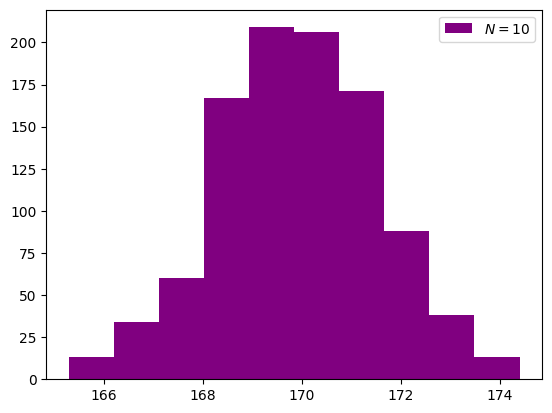

In [ ]:
def media_estimada(N):
    rd.seed(123)
    muestra = stats.norm.rvs(mu, sigma, N)
    media = np.mean(muestra)
    return media

Nrep = 1000

N=10
plt.hist([media_estimada(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
plt.legend();

En efecto, ¡se ve una forma acampanada, como es de esperar! Y, más aún, se ve que está más o menos centrada en $170$, que es la verdadera media de la distribución. Ahora bien, ¿qué pasaría si aumentamos $N$? La distribución debería seguir centrada en $170$, pero su varianza sería cada vez más pequeña. Verifiquémoslo.

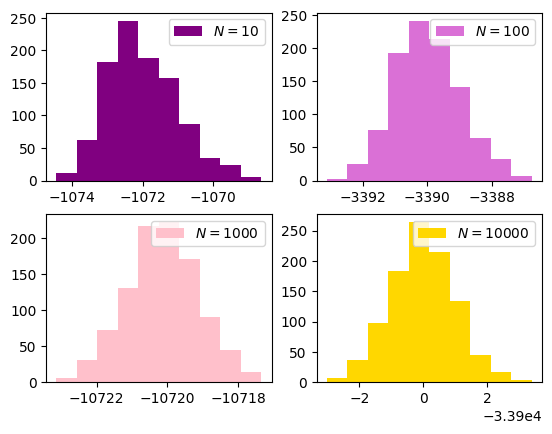

In [ ]:
# Esta sintaxis nos permite armar una grilla de 2x2 gráficos
fig, axs = plt.subplots(2,2)

N=10
axs[0,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
axs[0,0].legend()

N=100
axs[0,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')
axs[0,1].legend()

N=1000
axs[1,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')
axs[1,0].legend()

N=10000
axs[1,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
axs[1,1].legend();

¿Se observa lo que esperábamos? ¡Más o menos! ... En todos los gráficos, el centro sigue pareciendo ser $170$, sin embargo no parece haberse modificado la varianza. De hecho, los cuatro parecen tener la misma forma.

No obstante, el "distractor" visual que está entorpeciendo el análisis es la escala horizontal. Basta hacer los gráficos superpuestos para verificar que, el amarillo con $N=10000$, tiene mucha menos varianza que todos los otros (y, en general, a medida que aumenta $N$, los histogramas van quedando más "flacos").

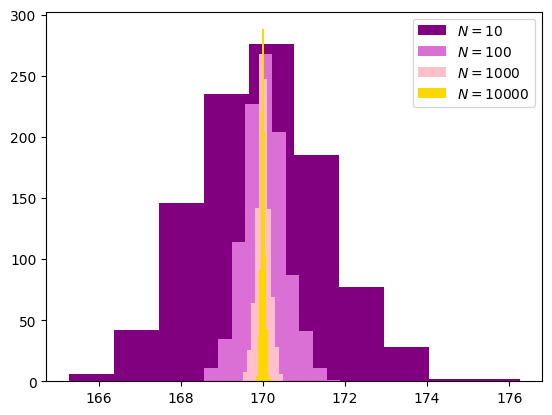

In [ ]:
N=10
plt.hist([media_estimada(N) for i in range(1,Nrep)], color='purple', label='$N=10$')

N=100
plt.hist([media_estimada(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')

N=1000
plt.hist([media_estimada(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')

N=10000
plt.hist([media_estimada(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
plt.legend();

Una forma de evitar esto de la escala sería estandarizando. Es decir, en lugar de obtener muestras de $\overline{X}_N$, muestrear

$$
Z_N=\frac{\overline{X}_N-170}{5/\sqrt{N}}.
$$

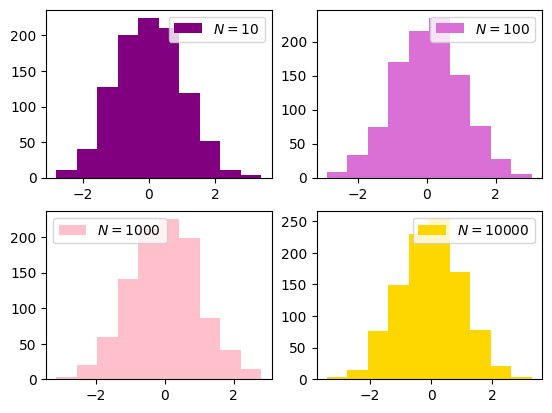

In [ ]:
def media_estimada_est(N):
    rd.seed(123)
    muestra = stats.norm.rvs(mu, sigma, N)
    media_est = (np.mean(muestra)-mu)/(sigma/np.sqrt(N))
    return media_est

# Esta sintaxis nos permite armar una grilla de 2x2 gráficos
fig, axs = plt.subplots(2,2)

Nrep = 1000

N=10
axs[0,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
axs[0,0].legend()

N=100
axs[0,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')
axs[0,1].legend()

N=1000
axs[1,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')
axs[1,0].legend()

N=10000
axs[1,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
axs[1,1].legend();

Veamos cómo la distribución empírica de $Z_N$ es muy similar en todos los casos, aun cuando $N$ cambia pasando de $10$ a $10000$ entre el gráfico violeta y el amarillo.

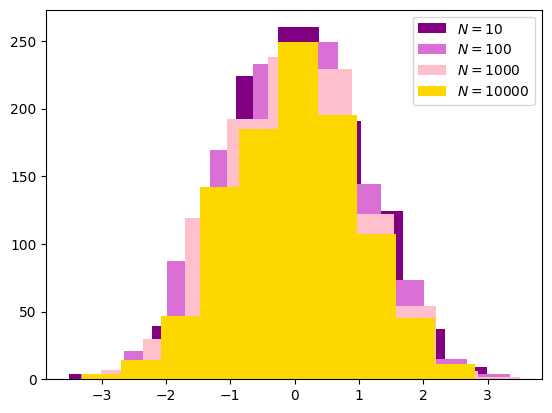

In [ ]:
N=10
plt.hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')

N=100
plt.hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')

N=1000
plt.hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')

N=10000
plt.hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
plt.legend();

Esto que acá observamos casi invariante ocurre así porque la distribución de $Z_N$ es exactamente normal. Sin embargo, este resultado será aproximado cuando trabajemos con variables $X_i$ cuya distribución sea cualquier otra. De hecho, en lo sucesivo, simularemos algunos resultados de convergencia para ver cómo son estos comportamientos.

#### Ejemplo 1: Variables uniformes

Sea $X$ la variable aleatoria con distribución uniforme en el intervalo $(0,20)$. Es decir, $X\sim U(0,20)$. Repitamos el análisis que hicimos en la sección anterior, pero para una muestra aleatoria de esta distribución. ¿Qué va a cambiar? Que ni $\overline{X}_N$ ni $Z_N$ serán normales, sin embargo, para $N$ suficientemente grandes esperaríamos observar aquello que el TCL anticipa: que lo son aproximadamente. En lo sucesivo, vamos a trabajar con $Z_N$ para facilitar las comparaciones y poder apreciar la tendencia para diferentes $N$.

In [ ]:
# Definimos los extremos del intervalo de la uniforme
a = 0
b = 20

# Longitud del intervalo
l = b-a

# La definimos
uniforme = stats.uniform(a, l)

# Obtenemos sus momentos
mu, sigma2 = uniforme.stats(moments='mv')

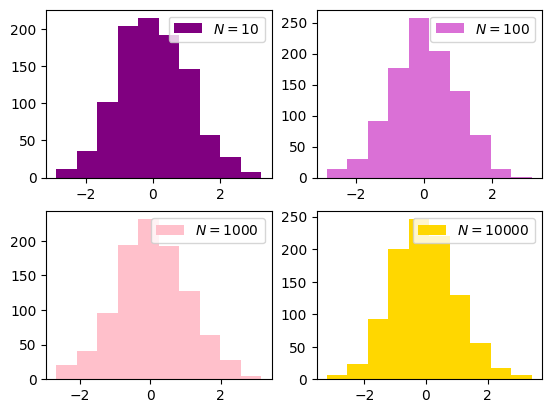

In [ ]:
def media_estimada_est(N):
    rd.seed(123)
    muestra = stats.uniform.rvs(a, l, N)
    media_est = (np.mean(muestra)-mu)/(np.sqrt(sigma2)/np.sqrt(N))
    return media_est

# Esta sintaxis nos permite armar una grilla de 2x2 gráficos
fig, axs = plt.subplots(2,2)

Nrep = 1000

N=10
axs[0,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
axs[0,0].legend()

N=100
axs[0,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')
axs[0,1].legend()

N=1000
axs[1,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')
axs[1,0].legend()

N=10000
axs[1,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
axs[1,1].legend();

¡La convergencia parece "buena", aún para $N=10$, que es claramente un valor "pequeño"! De hecho, visualmente estamos viendo algo parecido a lo que veíamos en el caso normal exacto del ejemplo inicial. ¡Aunque acá no tenemos normales sino promedios de uniformes! Uno podría pensar que el promedio de uniformes dista mucho de distribuirse normalmente. Y sí, la distribución exacta NO la conocemos y SEGURO no sea normal. Sin embargo, los promedios tienen distribución aproximadamente normal y cuán buena sea la aproximación para un $N$ dado, muchas veces dependerá de ciertas características que tengan las distribuciones que estemos estudiando. Veamos un ejemplo más extremo.

#### Ejemplo 2: Variables Bernoulli
Sea $X$ la variable aleatoria con distribución Bernoulli de parámetro $0.1$. Es decir, $X\sim Be(0.1)$. Veamos cómo se ve la convergencia anunciada por TCL cuando trabajamos con muestras de esta distribución.

In [ ]:
# Parámetro de la bernoulli
p = 0.1

# Definimos la bernoulli
bernoulli = stats.binom(1, p)

# Obtenemos sus momentos
mu, sigma2 = bernoulli.stats(moments='mv')

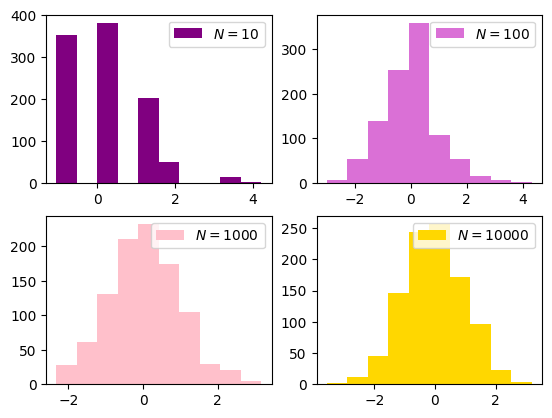

In [ ]:
def media_estimada_est(N):
    rd.seed(123)
    muestra = stats.binom.rvs(1, p, size=N)
    media_est = (np.mean(muestra)-mu)/(np.sqrt(sigma2)/np.sqrt(N))
    return media_est

# Esta sintaxis nos permite armar una grilla de 2x2 gráficos
fig, axs = plt.subplots(2,2)

Nrep = 1000

N=10
axs[0,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
axs[0,0].legend()

N=100
axs[0,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')
axs[0,1].legend()

N=1000
axs[1,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')
axs[1,0].legend()

N=10000
axs[1,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
axs[1,1].legend();

Para los $N$ más pequeños (10, e incluso 100), ya no es tan obvia la convergencia que anticipa TCL. Esto es así, en parte, porque la distribución original (además de ser discreta) es muy asimétrica: recordemos que es una Bernoulli con parámetro $0.1$. Repitamos el ejemplo anterior para dos valores más de $p$: $0.01$, que conduciría a algo más asimétrico que la situación actual, y $0.05$, que sería la situación de perfecta simetría para esta distribución.

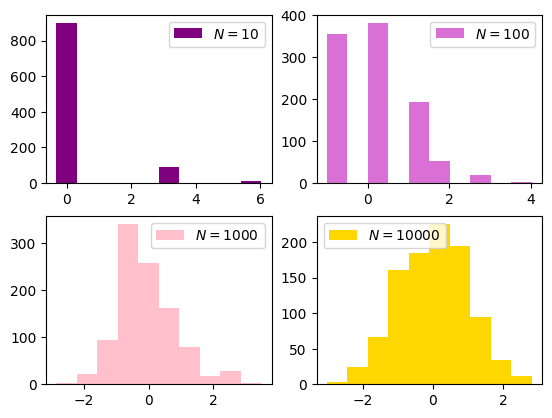

In [ ]:
# Parámetro de la bernoulli
p = 0.01

# Definimos la bernoulli
bernoulli = stats.binom(1, p)

# Obtenemos sus momentos
mu, sigma2 = bernoulli.stats(moments='mv')

# Graficamos Zn
fig, axs = plt.subplots(2,2)

Nrep = 1000

N=10
axs[0,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
axs[0,0].legend()

N=100
axs[0,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')
axs[0,1].legend()

N=1000
axs[1,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')
axs[1,0].legend()

N=10000
axs[1,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
axs[1,1].legend();

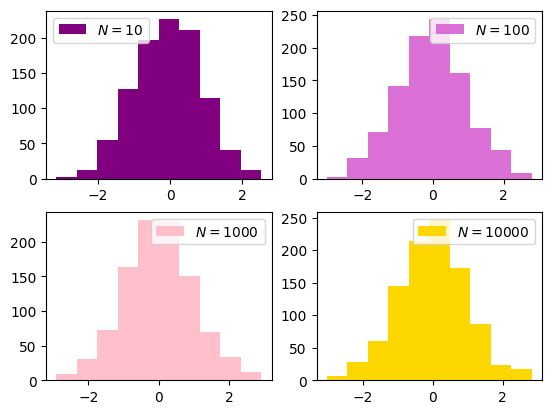

In [ ]:
# Parámetro de la bernoulli
p = 0.5

# Definimos la bernoulli
bernoulli = stats.binom(1, p)

# Obtenemos sus momentos
mu, sigma2 = bernoulli.stats(moments='mv')

# Graficamos Zn
fig, axs = plt.subplots(2,2)

Nrep = 1000

N=10
axs[0,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
axs[0,0].legend()

N=100
axs[0,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')
axs[0,1].legend()

N=1000
axs[1,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')
axs[1,0].legend()

N=10000
axs[1,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
axs[1,1].legend();

Estos ejemplos nos van ayudando a formar una "idea" de cuán grande debe ser $N$ (que, en general, es el tamaño de la muestra con la que trabajaremos) para que podamos usar razonablemente la aproximación normal para $Z_N$. En distribuciones muy asimétricas y/o discretas, es posible que se requiera un $N$ mayor, como para poder tener una aproximación más aceptable.

#### Ejemplo 3: Variables geométricas

Sea $X$ la variable aleatoria con distribución geométrica de parámetro $0.1$. Es decir, $X\sim Geom(0.1)$. Veamos cómo se ve la convergencia anunciada por TCL cuando trabajamos con muestras de esta distribución.

In [ ]:
# Parámetro de la geométrica
p = 0.1

# Definimos la geométrica
geometrica = stats.geom(p)

# Obtenemos sus momentos
mu, sigma2 = geometrica.stats(moments='mv')

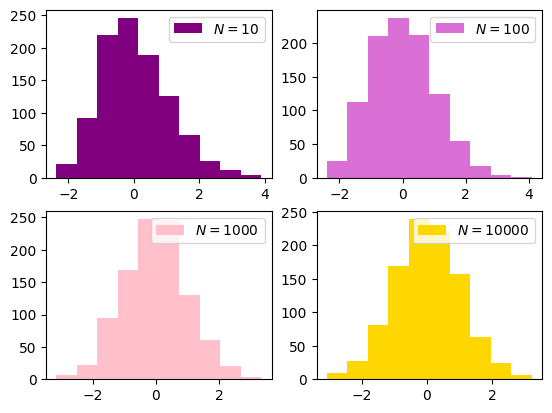

In [ ]:
def media_estimada_est(N):
    rd.seed(123)
    muestra = stats.geom.rvs(p, size=N)
    media_est = (np.mean(muestra)-mu)/(np.sqrt(sigma2)/np.sqrt(N))
    return media_est

# Esta sintaxis nos permite armar una grilla de 2x2 gráficos
fig, axs = plt.subplots(2,2)

Nrep = 1000

N=10
axs[0,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
axs[0,0].legend()

N=100
axs[0,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')
axs[0,1].legend()

N=1000
axs[1,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')
axs[1,0].legend()

N=10000
axs[1,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
axs[1,1].legend();

#### Ejemplo 4: Variables exponenciales

Sea $X$ la variable aleatoria con distribución exponencial de parámetro $2$. Es decir, $X\sim Exp(2)$. Veamos cómo se ve la convergencia anunciada por TCL cuando trabajamos con muestras de esta distribución.

In [ ]:
# Parámetro de la exponencial
lamb = 2

# La definimos
exponencial = stats.expon(0, 1/lamb)

# Obtenemos sus momentos
mu, sigma2 = exponencial.stats(moments='mv')

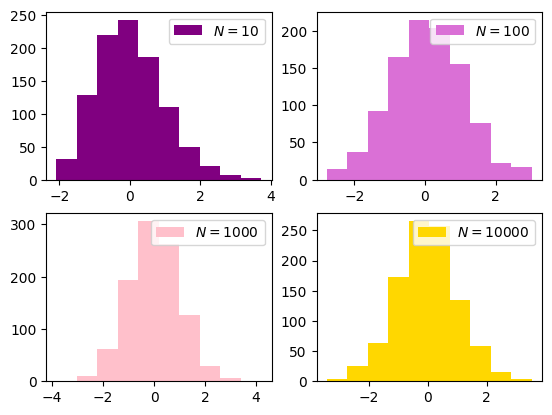

In [ ]:
def media_estimada_est(N):
    rd.seed(123)
    muestra = stats.expon.rvs(0, 1/lamb, size=N)
    media_est = (np.mean(muestra)-mu)/(np.sqrt(sigma2)/np.sqrt(N))
    return media_est

# Esta sintaxis nos permite armar una grilla de 2x2 gráficos
fig, axs = plt.subplots(2,2)

Nrep = 1000

N=10
axs[0,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='purple', label='$N=10$')
axs[0,0].legend()

N=100
axs[0,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='orchid', label='$N=100$')
axs[0,1].legend()

N=1000
axs[1,0].hist([media_estimada_est(N) for i in range(1,Nrep)], color='pink', label='$N=1000$')
axs[1,0].legend()

N=10000
axs[1,1].hist([media_estimada_est(N) for i in range(1,Nrep)], color='gold', label='$N=10000$')
axs[1,1].legend();

#### Conclusión

El Teorema central del límite provee un resultado sumamente sorprendente y útil:

* **sorprendente**, porque es llamativo que una variable cuya varianza se va a 0 a medida que crece $N$ sea capaz de tener una distribución normal estándar cuando está estandarizada y con $N$ en el infinito;

* y **útil**, porque es un teorema que exige muy pocas condiciones y da mucho a cambio: sin saber prácticamente NADA de una variable aleatoria, es posible construir un promedio a partir de una muestra de esta variable y, con el, aproximar cálculos de probabilidades que nos puedan interesar usando únicamente el resultado dado por el TCL.

**La pregunta más importante sea, entonces, ¿para qué $N$ puedo usar este resultado, dado que jamás voy a tener $N=\infty$ en la práctica?**

Las simulaciones de los cuatro ejemplos anteriores nos dejaron ver un surtido de casos bastante diversos, y algunas conclusiones observadas pueden ser las siguientes:

* El tamaño $N$ depende de aspectos intrínsecos de las variables, como su simetría, su dispersión, su naturaleza discreta o continua, entre otras.

* Por lo general, rondando $N=100$ ya se obtiene una aproximación razonablemente buena, aun en los casos más extremos.

* En los casos menos extremos, rondando $N=30$, ya se obtienen aproximaciones razonables. Para que un caso sea de este tipo debería tenerse, al menos, cierta simetría. Distribuciones muy asimétricas típicamente requerirán tamaños de muestra mayor.


# EJERCICIO DE TAREA

Esta semana NO vamos a hacer TP de simulación, sin embargo, te proponemos que hagas un ejercicio para poner a prueba lo que estudiamos.

---
Sea $X$ el tiempo que toma la ejecución de una tarea (en ms) en un servidor. Supongamos que $X\sim U(1,2)$. Si se registran los tiempos de $35$ ejecuciones independientes de la tarea, ¿cuál es la probabilidad de que el tiempo promedio sea superior a $1.6$?

*   Calculá esa probabilidad usando TCL. Indicá si tu resultado es exacto o aproximado.

*   Aproximá esa probabilidad realizando una simulación.
---

El último inciso de esta tarea es desafiante y vas a tener que integrar lo que estudiaste de TCL con lo que viste acerca de LGN (especialmente, en lo relacionado con aproximar la probabilidad a través de una simulación).

# ¡Yapa! Dos estimadores para un mismo parámetro. ¿Qué tal se comportan?

Llamamos **estimador** a una función de la muestra aleatoria que es capaz de brindar información sobre un parámetro de la población.

Por ejemplo, si $X$ es una variable aleatoria que caracteriza a la altura (en centímetros) de las personas de Argentina y sabemos que $X\sim N(\mu,\sigma^2)$, es posible que desconozcamos los parámetros $\mu$ y $\sigma^2$ que la caracterizan, pues, para conocerlos, deberíamos hacer un censo de alturas para toda la población.

Sin embargo, si tomáramos una muestra aleatoria $X_1, \cdots, X_n$ de esas alturas, podríamos usarla para **estimar** alguno de esos parámetros desconocidos.

En el ejemplo 2 vimos que un estimador que parece razonable para conocer $\mu$ es $\overline{X}_n$. Es decir, ¡el promedio de las alturas de la muestra! Simulamos y vimos (a ojo) que la estimación era buena y, gracias al TCL supimos, además, que con $n=\infty$, $\overline{X}_n$ converge a $\mu$. Es decir, en el límite, son iguales.

Esta es una propiedad deseable de los estimadores, y es lo que intuitivamente nos hace pensar que, para mejorar la estimación de algo que no conocemos, siempre conviene trabajar con "muestras grandes".

Sin embargo, hay más propiedades de los estimadores, que aunque no las estudiemos, podemos verlas empíricamente en una simulación. Te invitamos a explorar este último ejemplo de YAPA.

Sea $X$ la variable aleatoria con distribución uniforme en el intervalo $(0,b)$. Es decir, $X\sim U(0,b)$. Notemos que $b$ es un parámetro desconocido de la distribución: es decir, conocemos el límite inferior de su soporte, que es $0$, pero no el superior, que es $b$.

Imaginemos que tenemos una muestra aleatoria de esa distribución: $X_1, \ldots, X_n$. ¿Cómo estimaríamos $b$ a partir de ella?

Podemos pensar en dos alternativas, pero para eso, tenemos que tener muy en claro qué rol cumple $b$ en la distribución de $X$.

Al respecto, notemos que:
*   $b$ está relacionado con el "centro" de la distribución: recordemos que $E(X)=b/2$. Por lo tanto, si pudiéramos estimar $E(X)$ (que solemos llamar $\mu$), para estimar $b$ solo habría que multiplicar por $2$.
*   por otro lado, $b$ es el extremo superior del soporte de la distribución, es decir, la variable aleatoria $X$ puede tomar valores únicamente en $(0,b)$ y, de hecho, $b$ es ¡el máximo valor que puede tomar $X$!

Esto nos permite pensar en dos posibles estimadores de $b$ a partir de una muestra $X_1, \ldots, X_n$:

*  **Estimador 1:** el promedio de la muestra multiplicado por $2$, es decir, $2\overline{X}_n$.

*  **Estimador 2:** el máximo observado en la muestra, es decir, $\max_{1\leq i \leq n} \{X_i\}$.

**Simulemos y pongamos a prueba ambos estimadores a ver cuál nos parece que se comporta mejor.**

In [ ]:
# Definimos los extremos del intervalo de la uniforme
a = 0
b = 20

# Longitud del intervalo
l = b-a

# La definimos
uniforme = stats.uniform(a, l)

# Obtenemos sus momentos
esperanza, varianza = uniforme.stats(moments='mv')

Armemos una función que compute el estimador 1 a partir de una muestra de tamaño $N$ de la uniforme. Luego, variemos $N$ de 1 a 1000 para ver cómo se comporta el estimdor a medida que aumenta el tamaño de muestra. Esto es útil verlo gráficamente: si el estimador es "bueno", deberíamos ver que, cuando $N$ aumenta, se acerca al verdadero valor, que en este ejemplo es 20.

**IMPORTANTE**: dentro de la función del estimador, cuando generemos las muestras de tamaño $N$, tenemos que fijar la semilla. Esto es importante porque queremos trabajar con la misma muestra, solo que, incrementada. Es decir, la muestra de tamaño $N=20$ tiene las mismas 10 primeras observaciones que la muestra de tamaño $N=10$, y así, con todas.

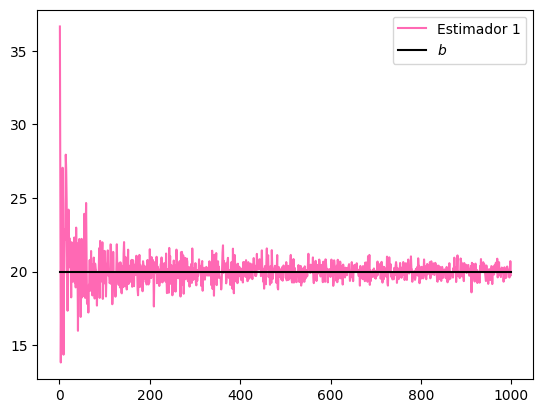

In [ ]:
def estimador_1(N):
    rd.seed(123)
    muestra = stats.uniform.rvs(a, l, N)
    est1 = 2*np.mean(muestra)
    return est1

N=1000
enes = range(1,N)
param = [b for n in enes]
plt.plot(enes,[estimador_1(n) for n in enes], color='hotpink', label='Estimador 1')
plt.plot(enes,param, color='black', label='$b$')
plt.legend();

Repitamos lo mismo para el estimador 2.

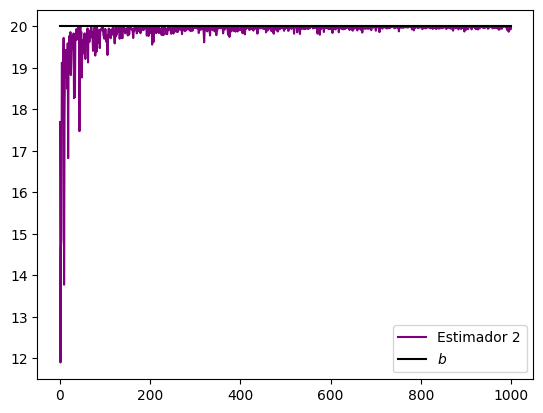

In [ ]:
def estimador_2(N):
    rd.seed(123)
    muestra = stats.uniform.rvs(a, l, N)
    est2 = max(muestra)
    return est2

N=1000
enes = range(1,N)
param = [b for n in enes]
plt.plot(enes,[estimador_2(n) for n in enes], color='purple', label='Estimador 2')
plt.plot(enes,param, color='black', label='$b$')
plt.legend();

**¿Qué diferencias encontrás entre uno y otro estimador?**


*  Ambos parecen "acercarse" a 20 cuando $N$ aumenta, y esa es una cualidad deseable.
*  El estimador 2 parece acercarse siempre "por debajo", ¿por qué te parece que ocurre esto?
*  Estimador 1 parece ser más variable que el estimador 2, es decir, podríamos pensar que su varianza es mayor.

Para visualizar esto, podemos hacer un gráfico superpuesto.

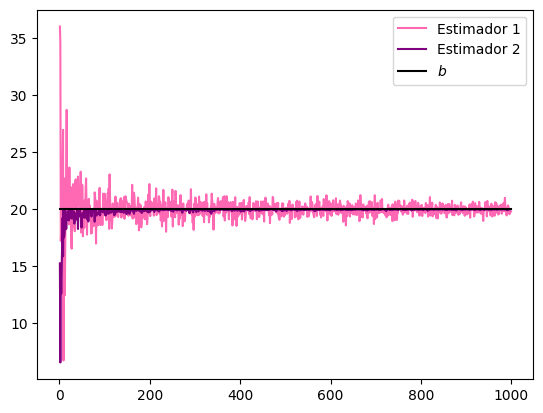

In [ ]:
N=1000
enes = range(1,N)
param = [b for n in enes]
plt.plot(enes,[estimador_1(n) for n in enes], color='hotpink', label='Estimador 1')
plt.plot(enes,[estimador_2(n) for n in enes], color='purple', label='Estimador 2')
plt.plot(enes,param, color='black', label='$b$')
plt.legend();

Acá vemos cómo se comportan para muestras de tamaño 1 a 100.

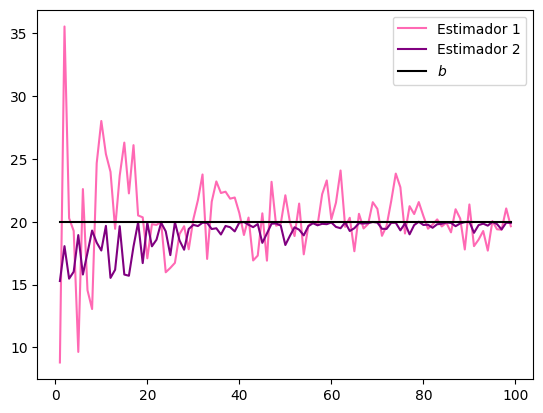

In [ ]:
N=100
enes = range(1,N)
param = [b for n in enes]
plt.plot(enes,[estimador_1(n) for n in enes], color='hotpink', label='Estimador 1')
plt.plot(enes,[estimador_2(n) for n in enes], color='purple', label='Estimador 2')
plt.plot(enes,param, color='black', label='$b$')
plt.legend();

Y acá, un histograma con $Nrep=1000$ repeticiones de cada una de las estimaciones con $N=100$ para los estimadores propuestos.

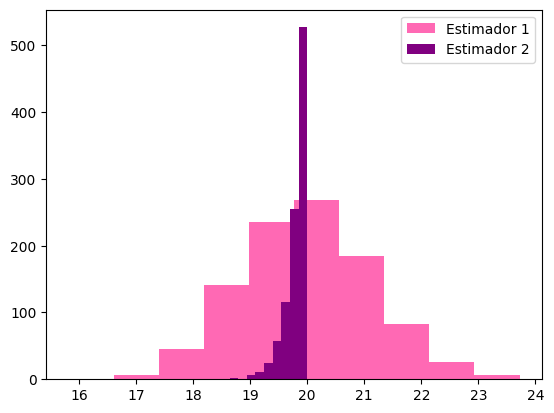

In [ ]:
N=100
Nrep = 1000
plt.hist([estimador_1(N) for i in range(1,Nrep)], color='hotpink', label='Estimador 1')
plt.hist([estimador_2(N) for i in range(1,Nrep)], color='purple', label='Estimador 2')
plt.legend();

**¿Con cuál de los dos estimadores te quedarías? ¿Por qué?**